# **¿Qué compran las familias correntinas en el super?**

Importamos las librerías necesarias

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Creación del dataframe de compras

Creación del data frame.

Subimos el data set extraído del portal de datos provincial, cuyo link se presenta a continuación, para luego crear el dataframe.
https://datos.ciudaddecorrientes.gov.ar/dataset/compras-minoristas-en-supermercados

In [113]:
df_super= pd.read_csv("/content/supermercado_nominal - supermercado_nominal.csv", sep=',', parse_dates=['periodo'])
df_super.head()

,periodo,total,bebidas,almacen,panaderia,lacteos,carnes,verduleria_y_fruteria,alimentos_preparados_y_rotiseria,articulos_de_limpieza_y_perfumeria,indumentaria_calzado_y_textiles_para_el_hogar,electronicos_y_articulos_para_el_hogar,otros
0,2017-01-01,421357.99,56089.78,95233.30,19489.68,32732.90,52537.52,17283.34,14425.10,54286.48,11345.66,27608.74,40325.50
1,2017-02-01,407177.76,54237.17,99676.27,19219.46,33253.00,52309.88,18125.88,13795.52,50860.05,10097.59,20888.29,34714.64
2,2017-03-01,424769.53,55668.90,107219.06,20699.78,35317.68,54124.67,19261.21,14662.99,53473.30,10312.23,21348.92,32680.77
3,2017-04-01,445875.40,54345.09,119413.83,22379.49,35946.86,57641.54,18255.38,14781.69,54213.43,13307.78,23682.74,31907.57
4,2017-05-01,431713.35,46797.37,111650.58,21367.77,35210.99,53385.08,16555.73,14324.76,53629.28,15074.70,30791.66,32925.43


In [112]:
df_super.columns

Index(['periodo', 'total', 'bebidas', 'almacen', 'panaderia', 'lacteos',
       'carnes', 'verduleria_y_fruteria', 'alimentos_preparados_y_rotiseria',
       'articulos_de_limpieza_y_perfumeria',
       'indumentaria_calzado_y_textiles_para_el_hogar',
       'electronicos_y_articulos_para_el_hogar', 'otros'],
      dtype='object')

In [81]:
df_super.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   periodo                                        69 non-null     datetime64[ns]
 1   total                                          69 non-null     float64       
 2   bebidas                                        69 non-null     float64       
 3   almacen                                        69 non-null     float64       
 4   panaderia                                      69 non-null     float64       
 5   lacteos                                        69 non-null     float64       
 6   carnes                                         69 non-null     float64       
 7   verduleria_y_fruteria                          69 non-null     float64       
 8   alimentos_preparados_y_rotiseria               69 non-null    

Empezamos analizando la variable almacen en función del tiempo.

In [82]:
df_super2=df_super[['periodo', 'almacen']]
df_super2

,periodo,almacen
0,2017-01-01,95233.30
1,2017-02-01,99676.27
2,2017-03-01,107219.06
3,2017-04-01,119413.83
4,2017-05-01,111650.58
...,...,...
64,2022-05-01,547836.00
65,2022-06-01,590114.00
66,2022-07-01,679483.00
67,2022-08-01,719635.00


# Creación del dataframe precio histórico del dólar.

Como nuestra moneda se devalúa constantemente, es más representativo analizar los gastos en función al dolar oficial.
Para ello importamos un dataset de un portal nacional abieto.
https://datos.gob.ar/dataset/sspm-tipos-cambio-historicos/archivo/sspm_175.1

In [83]:
df_dolar= pd.read_csv("/content/tipos-de-cambio-historicos.csv", sep=',', parse_dates=['indice_tiempo'])
df_dolar

,indice_tiempo,dolar_tipo_unico,dolar_finan_esp_compra,dolar_finan_esp_venta,dolar_financiero_compra,dolar_financiero_venta,dolar_libre_compra,dolar_libre_venta,dolar_oficial_compra,dolar_oficial_venta,dolar_estadounidense,dolar_referencia_com_3500
0,1970-01-05,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1970-01-06,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970-01-07,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1970-01-08,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1970-01-09,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19592,2023-08-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0517,349.9750
19593,2023-08-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0517,349.9917
19594,2023-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,349.9750,349.9750
19595,2023-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,349.9750,349.9750


In [84]:
df_dolar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19597 entries, 0 to 19596
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   indice_tiempo              19597 non-null  datetime64[ns]
 1   dolar_tipo_unico           817 non-null    float64       
 2   dolar_finan_esp_compra     192 non-null    float64       
 3   dolar_finan_esp_venta      192 non-null    float64       
 4   dolar_financiero_compra    1994 non-null   float64       
 5   dolar_financiero_venta     1994 non-null   float64       
 6   dolar_libre_compra         4998 non-null   float64       
 7   dolar_libre_venta          4827 non-null   float64       
 8   dolar_oficial_compra       1022 non-null   float64       
 9   dolar_oficial_venta        1022 non-null   float64       
 10  dolar_estadounidense       11558 non-null  float64       
 11  dolar_referencia_com_3500  7851 non-null   float64       
dtypes: d

In [85]:
#Como la información de compras empieza desde enero del 2017, borramos del df los valores del dolar anteriores.
df_dolar2= df_dolar.iloc[17163:19596]
df_dolar2

,indice_tiempo,dolar_tipo_unico,dolar_finan_esp_compra,dolar_finan_esp_venta,dolar_financiero_compra,dolar_financiero_venta,dolar_libre_compra,dolar_libre_venta,dolar_oficial_compra,dolar_oficial_venta,dolar_estadounidense,dolar_referencia_com_3500
17163,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.8900,15.8502
17164,2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.9200,15.9192
17165,2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.9450,15.8955
17166,2017-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0800,16.0533
17167,2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.9600,15.9942
...,...,...,...,...,...,...,...,...,...,...,...,...
19591,2023-08-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,349.9750,349.9750
19592,2023-08-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0517,349.9750
19593,2023-08-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0517,349.9917
19594,2023-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,349.9750,349.9750


In [86]:
#Nos quedamos solo con la columna dolar_referencia_com_3500, que representa el dolar oficial, y la renombramos.
df_dolar3=df_dolar2[['indice_tiempo','dolar_referencia_com_3500']]
df_dolar4=df_dolar3.rename({'indice_tiempo':'periodo', 'dolar_referencia_com_3500':'dolar_referencia'}, axis='columns')
df_dolar4

,periodo,dolar_referencia
17163,2017-01-01,15.8502
17164,2017-01-02,15.9192
17165,2017-01-03,15.8955
17166,2017-01-04,16.0533
17167,2017-01-05,15.9942
...,...,...
19591,2023-08-26,349.9750
19592,2023-08-27,349.9750
19593,2023-08-28,349.9917
19594,2023-08-29,349.9750


# Creación del dataframe de gastos en almacen en función del dólar

Unimos el dataframe de compras de almacen y el del valor del dolar a través de la columna periodo.

In [87]:
from numpy.core.numeric import outer
outer_join_df=pd.merge(df_super2, df_dolar4, on='periodo', how='outer')
outer_join_df

,periodo,almacen,dolar_referencia
0,2017-01-01,95233.30,15.8502
1,2017-02-01,99676.27,15.8350
2,2017-03-01,107219.06,15.4770
3,2017-04-01,119413.83,15.3818
4,2017-05-01,111650.58,15.4268
...,...,...,...
2428,2023-08-26,NaN,349.9750
2429,2023-08-27,NaN,349.9750
2430,2023-08-28,NaN,349.9917
2431,2023-08-29,NaN,349.9750


In [88]:
#Como tenemos más registros diarios del dolar que de compras, nos quedamos solo con los registros de los días de compras.
df_nuevo=outer_join_df.dropna()
df_nuevo

,periodo,almacen,dolar_referencia
0,2017-01-01,95233.30,15.8502
1,2017-02-01,99676.27,15.8350
2,2017-03-01,107219.06,15.4770
3,2017-04-01,119413.83,15.3818
4,2017-05-01,111650.58,15.4268
...,...,...,...
64,2022-05-01,547836.00,115.3117
65,2022-06-01,590114.00,120.3250
66,2022-07-01,679483.00,125.4117
67,2022-08-01,719635.00,131.9350


Trabajamos con las variables almacen y doral_referencia para convertir todos los valores de pesos en dólares.

In [89]:
a=df_nuevo['almacen']
a

0      95233.30
1      99676.27
2     107219.06
3     119413.83
4     111650.58
        ...    
64    547836.00
65    590114.00
66    679483.00
67    719635.00
68    721626.00
Name: almacen, Length: 69, dtype: float64

In [90]:
b=df_nuevo['dolar_referencia']
b

0      15.8502
1      15.8350
2      15.4770
3      15.3818
4      15.4268
        ...   
64    115.3117
65    120.3250
66    125.4117
67    131.9350
68    139.0050
Name: dolar_referencia, Length: 69, dtype: float64

In [91]:
almacen_en_dolares=a.div(b)
almacen_en_dolares

0     6008.334280
1     6294.680770
2     6927.638431
3     7763.319637
4     7237.442632
         ...     
64    4750.914261
65    4904.334095
66    5418.019212
67    5454.466214
68    5191.367217
Length: 69, dtype: float64

In [92]:
#Agregamos los nuevos datos a la tabla.
df_intermedio=df_nuevo.assign(almacen_en_dolares=almacen_en_dolares.values)
df_intermedio

,periodo,almacen,dolar_referencia,almacen_en_dolares
0,2017-01-01,95233.30,15.8502,6008.334280
1,2017-02-01,99676.27,15.8350,6294.680770
2,2017-03-01,107219.06,15.4770,6927.638431
3,2017-04-01,119413.83,15.3818,7763.319637
4,2017-05-01,111650.58,15.4268,7237.442632
...,...,...,...,...
64,2022-05-01,547836.00,115.3117,4750.914261
65,2022-06-01,590114.00,120.3250,4904.334095
66,2022-07-01,679483.00,125.4117,5418.019212
67,2022-08-01,719635.00,131.9350,5454.466214


In [93]:
#Descartamos la columna de precios en pesos.
df_final=df_intermedio[['periodo', 'dolar_referencia', 'almacen_en_dolares']]
df_final

,periodo,dolar_referencia,almacen_en_dolares
0,2017-01-01,15.8502,6008.334280
1,2017-02-01,15.8350,6294.680770
2,2017-03-01,15.4770,6927.638431
3,2017-04-01,15.3818,7763.319637
4,2017-05-01,15.4268,7237.442632
...,...,...,...
64,2022-05-01,115.3117,4750.914261
65,2022-06-01,120.3250,4904.334095
66,2022-07-01,125.4117,5418.019212
67,2022-08-01,131.9350,5454.466214


Terminamos nuestra tabla de compras en almacen en dólares.

In [94]:
#Cambiamos el índice
df_compras_almacen=df_final.set_index('periodo')
df_compras_almacen

,dolar_referencia,almacen_en_dolares
periodo,,
2017-01-01,15.8502,6008.334280
2017-02-01,15.8350,6294.680770
2017-03-01,15.4770,6927.638431
2017-04-01,15.3818,7763.319637
2017-05-01,15.4268,7237.442632
...,...,...
2022-05-01,115.3117,4750.914261
2022-06-01,120.3250,4904.334095
2022-07-01,125.4117,5418.019212


# Gráfico de compras minoristas de almacen en dólares.

<Axes: title={'center': 'Compras minoristas de almacen en dólares'}, xlabel='periodo', ylabel='compra en dólares'>

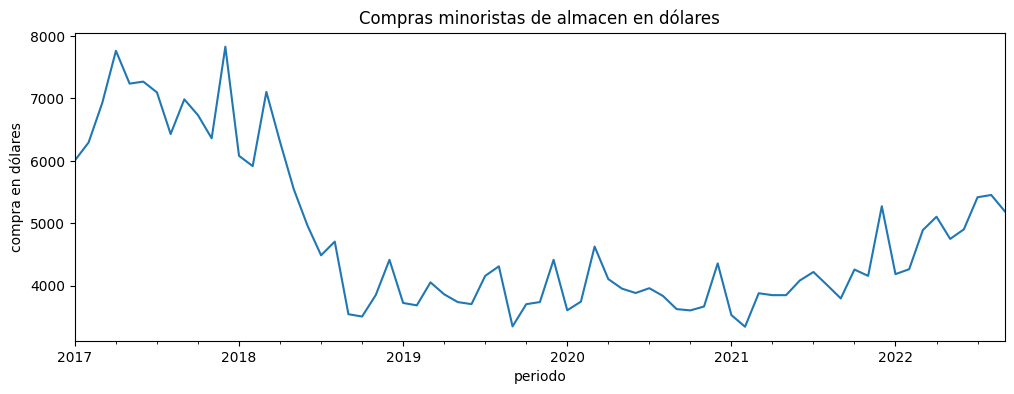

In [95]:
df_compras_almacen['almacen_en_dolares'].plot(title= 'Compras minoristas de almacen en dólares', ylabel='compra en dólares', figsize=[12,4])

De esta gráfica se puede observar que en año 2018 se produce una caída en las compras minoristas de la sección almacen (en dólares), ya que hubo una devaluación del 100%.
También se puede observar que fluctuó levemente entre el 2019 y 2021, que puede tener que ver con la situación de pandemia.
Para el 2022 está ligeramente en alza, y sería interesante tener los datos del 2023 también.

# Creación del dataframe de gastos en artículos comestibles en función del dólar

Una información interesante sería también analizar y comparar los gastos en compras de diferentes productos, por ejemplo, entre artículos comestibles.

In [96]:
df_super3=df_super[['periodo', 'bebidas',	'panaderia','lacteos', 'carnes',	'verduleria_y_fruteria']]
df_super3

,periodo,bebidas,panaderia,lacteos,carnes,verduleria_y_fruteria
0,2017-01-01,56089.78,19489.68,32732.90,52537.52,17283.34
1,2017-02-01,54237.17,19219.46,33253.00,52309.88,18125.88
2,2017-03-01,55668.90,20699.78,35317.68,54124.67,19261.21
3,2017-04-01,54345.09,22379.49,35946.86,57641.54,18255.38
4,2017-05-01,46797.37,21367.77,35210.99,53385.08,16555.73
...,...,...,...,...,...,...
64,2022-05-01,267922.00,101743.00,199773.00,328132.00,73115.00
65,2022-06-01,338387.00,107987.00,206867.00,344471.00,70841.00
66,2022-07-01,455930.00,119394.00,230850.00,384382.00,81800.00
67,2022-08-01,379603.00,116358.00,233436.00,374909.00,88994.00


Separamos los datos de cada columna.

In [97]:
c=df_super3['bebidas']

In [98]:
bebidas_en_dolares=c.div(b)
bebidas_en_dolares

0     3538.742729
1     3425.144932
2     3596.879240
3     3533.077403
4     3033.511162
         ...     
64    2323.458938
65    2812.275088
66    3635.466228
67    2877.197105
68    3152.591633
Length: 69, dtype: float64

In [99]:
d=df_super3['panaderia']

In [100]:
panaderia_en_dolares=d.div(b)
panaderia_en_dolares

0     1229.617292
1     1213.732870
2     1337.454287
3     1454.933103
4     1385.107086
         ...     
64     882.330241
65     897.461043
66     952.016439
67     881.934286
68     894.845509
Length: 69, dtype: float64

In [101]:
e=df_super3['lacteos']

In [102]:
lacteos_en_dolares=e.div(b)
lacteos_en_dolares

0     2065.141134
1     2099.968424
2     2281.946114
3     2336.973566
4     2282.455856
         ...     
64    1732.460800
65    1719.235404
66    1840.737347
67    1769.325804
68    1817.085716
Length: 69, dtype: float64

In [103]:
f=df_super3['carnes']

In [104]:
carnes_en_dolares=f.div(b)
carnes_en_dolares

0     3314.628207
1     3303.434165
2     3497.103444
3     3747.385872
4     3460.541395
         ...     
64    2845.608902
65    2862.838147
66    3064.961244
67    2841.618979
68    2901.866839
Length: 69, dtype: float64

In [105]:
g=df_super3['verduleria_y_fruteria']

In [106]:
verduleria_y_fruteria_en_dolares=g.div(b)
verduleria_y_fruteria_en_dolares

0     1090.417787
1     1144.671929
2     1244.505395
3     1186.816887
4     1073.179791
         ...     
64     634.064020
65     588.747143
66     652.251744
67     674.529124
68     728.865868
Length: 69, dtype: float64

Unimos todos los datos en un mismo df.

In [107]:
df_comparativo1=df_final.assign(bebidas_en_dolares=bebidas_en_dolares.values, panaderia_en_dolares=panaderia_en_dolares.values, lacteos_en_dolares=lacteos_en_dolares.values, carnes_en_dolares=carnes_en_dolares.values, verduleria_y_fruteria_en_dolares=verduleria_y_fruteria_en_dolares.values)
df_comparativo1

,periodo,dolar_referencia,almacen_en_dolares,bebidas_en_dolares,panaderia_en_dolares,lacteos_en_dolares,carnes_en_dolares,verduleria_y_fruteria_en_dolares
0,2017-01-01,15.8502,6008.334280,3538.742729,1229.617292,2065.141134,3314.628207,1090.417787
1,2017-02-01,15.8350,6294.680770,3425.144932,1213.732870,2099.968424,3303.434165,1144.671929
2,2017-03-01,15.4770,6927.638431,3596.879240,1337.454287,2281.946114,3497.103444,1244.505395
3,2017-04-01,15.3818,7763.319637,3533.077403,1454.933103,2336.973566,3747.385872,1186.816887
4,2017-05-01,15.4268,7237.442632,3033.511162,1385.107086,2282.455856,3460.541395,1073.179791
...,...,...,...,...,...,...,...,...
64,2022-05-01,115.3117,4750.914261,2323.458938,882.330241,1732.460800,2845.608902,634.064020
65,2022-06-01,120.3250,4904.334095,2812.275088,897.461043,1719.235404,2862.838147,588.747143
66,2022-07-01,125.4117,5418.019212,3635.466228,952.016439,1840.737347,3064.961244,652.251744
67,2022-08-01,131.9350,5454.466214,2877.197105,881.934286,1769.325804,2841.618979,674.529124


In [108]:
#Elimino la columna de dólares que no vamos a usar en este momento.
df_comparativo2=df_comparativo1.drop(columns=['dolar_referencia'])
df_comparativo2

,periodo,almacen_en_dolares,bebidas_en_dolares,panaderia_en_dolares,lacteos_en_dolares,carnes_en_dolares,verduleria_y_fruteria_en_dolares
0,2017-01-01,6008.334280,3538.742729,1229.617292,2065.141134,3314.628207,1090.417787
1,2017-02-01,6294.680770,3425.144932,1213.732870,2099.968424,3303.434165,1144.671929
2,2017-03-01,6927.638431,3596.879240,1337.454287,2281.946114,3497.103444,1244.505395
3,2017-04-01,7763.319637,3533.077403,1454.933103,2336.973566,3747.385872,1186.816887
4,2017-05-01,7237.442632,3033.511162,1385.107086,2282.455856,3460.541395,1073.179791
...,...,...,...,...,...,...,...
64,2022-05-01,4750.914261,2323.458938,882.330241,1732.460800,2845.608902,634.064020
65,2022-06-01,4904.334095,2812.275088,897.461043,1719.235404,2862.838147,588.747143
66,2022-07-01,5418.019212,3635.466228,952.016439,1840.737347,3064.961244,652.251744
67,2022-08-01,5454.466214,2877.197105,881.934286,1769.325804,2841.618979,674.529124


In [109]:
#Cambio de índice.
df_comparativo_final=df_comparativo2.set_index('periodo')
df_comparativo_final

,almacen_en_dolares,bebidas_en_dolares,panaderia_en_dolares,lacteos_en_dolares,carnes_en_dolares,verduleria_y_fruteria_en_dolares
periodo,,,,,,
2017-01-01,6008.334280,3538.742729,1229.617292,2065.141134,3314.628207,1090.417787
2017-02-01,6294.680770,3425.144932,1213.732870,2099.968424,3303.434165,1144.671929
2017-03-01,6927.638431,3596.879240,1337.454287,2281.946114,3497.103444,1244.505395
2017-04-01,7763.319637,3533.077403,1454.933103,2336.973566,3747.385872,1186.816887
2017-05-01,7237.442632,3033.511162,1385.107086,2282.455856,3460.541395,1073.179791
...,...,...,...,...,...,...
2022-05-01,4750.914261,2323.458938,882.330241,1732.460800,2845.608902,634.064020
2022-06-01,4904.334095,2812.275088,897.461043,1719.235404,2862.838147,588.747143
2022-07-01,5418.019212,3635.466228,952.016439,1840.737347,3064.961244,652.251744


# Gráfico de compras minoristas de artículos comestibles en dólares

<Axes: title={'center': 'Compras minoristas de artículos comestibles en dólares'}, xlabel='periodo', ylabel='compra en dólares'>

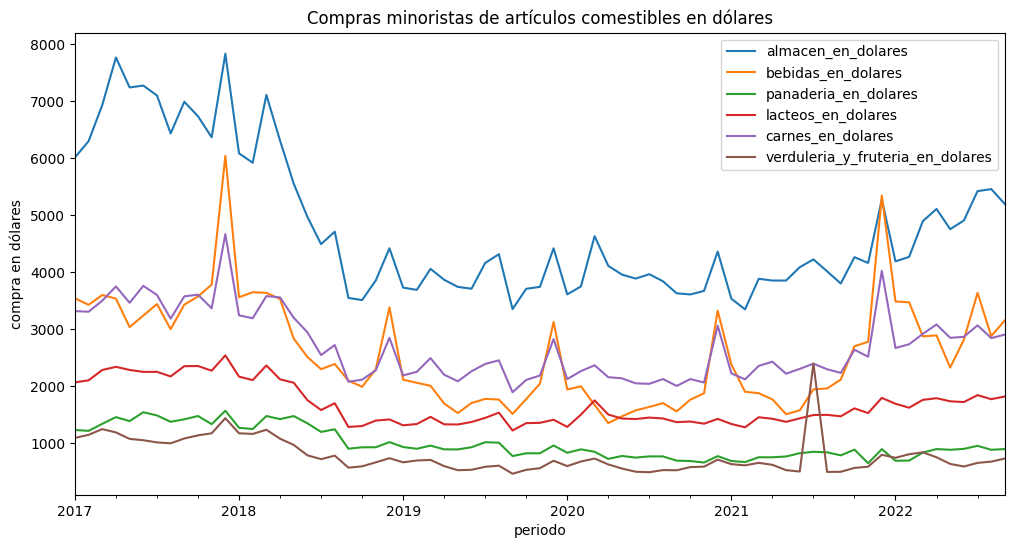

In [110]:
df_comparativo_final.plot(title= 'Compras minoristas de artículos comestibles en dólares', ylabel='compra en dólares', figsize=[12,6])

Con estos gráficos podemos apreciar que la compra que más se hace en supermercados es de artículos de almacen, que a su vez es el que presentó una caída más grande en el 2018.

Podemos ver que el top tres en compras es de articulos de almacen, carnes y bebidas, estando estas dos últimas muy parejas. Además podemos observar que la compra de carnes y bedidas presentan unos picos al final e inicio de cada año, esto puede deberse a la cobra de aguinaldo y las fiestas. Otra información interesante es que se gasta más en otro tipo de bedidas que en bebidas lácteas.

Por otra parte, en los tres rubros donde hay menos presupuesto en compras es en lácteos, panadería y frutas y verduras, que puede deberse a que se consume menos o que sus costos son más baratos en comparación a otro tipo de artículos. También son los que más constantes se mantuvieron a través del tiempo.

Como conclusión, podemos decir que las prioridades en gastos de los correntinos en artículos comestibles se mantuvieron con los años, y que también hay caídas y ajustes en los períodos donde el valor del dolar subió bruscamente.